In [43]:
if (!require(ggplot2)) install.packages("ggplot2")
if (!require(car)) install.packages("car")
if (!require(lmtest)) install.packages("lmtest")

complexidade <- c(1, 2, 3, 4, 5, 6, 7, 8, 9, 10)
bugs <- c(0, 1, 3, 2, 5, 8, 7, 9, 12, 14)

dados <- data.frame(complexidade, bugs)

head(dados)

,complexidade,bugs
,<dbl>,<dbl>
1,1,0
2,2,1
3,3,3
4,4,2
5,5,5
6,6,8


In [44]:
modelo <- lm(bugs ~ complexidade, data = dados)
summary(modelo)


Call:
lm(formula = bugs ~ complexidade, data = dados)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.8182 -0.7621  0.4000  0.7349  1.1394 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)   -2.2667     0.7633   -2.97   0.0179 *  
complexidade   1.5212     0.1230   12.37  1.7e-06 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.117 on 8 degrees of freedom
Multiple R-squared:  0.9503,	Adjusted R-squared:  0.9441 
F-statistic: 152.9 on 1 and 8 DF,  p-value: 1.705e-06


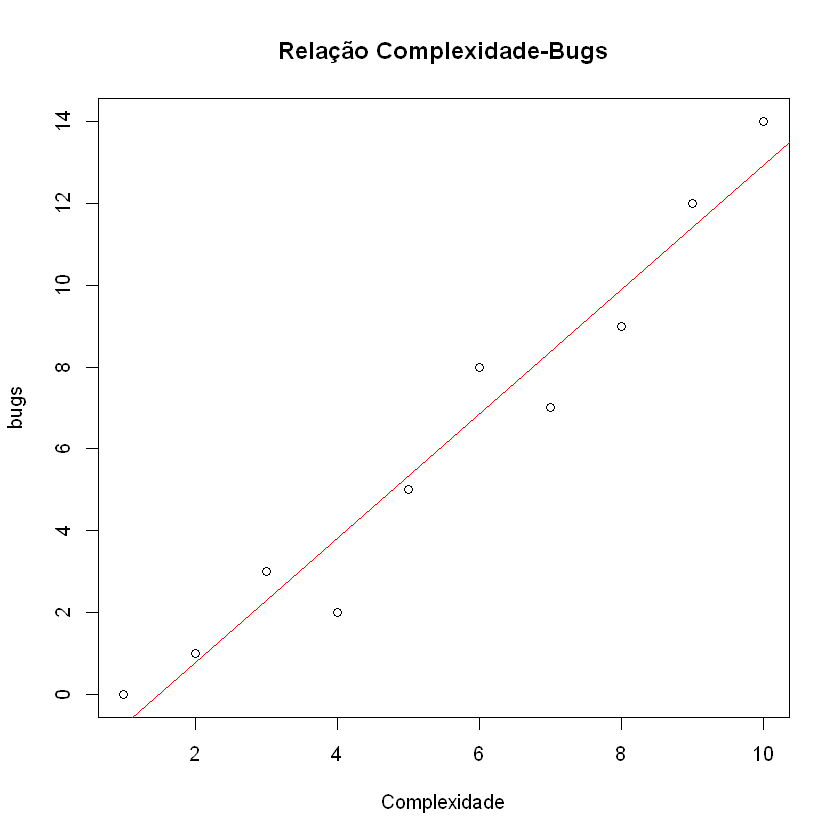

In [45]:
# Pressupostos da Regressão Linear
# Verificação de Pressupostos

# 1. Linearidade
plot(dados$complexidade, dados$bugs,
     main = "Relação Complexidade-Bugs", xlab="Complexidade", ylab = "bugs")
abline(modelo, col = "red")

# Verificamos se o aumento no tamanho do conteúdo está associado a um aumento proporcional no tempo de carregamento. 
# Isso pode ser visualizado com um gráfico de dispersão; esperamos ver uma relação linear aproximada entre as variáveis.

In [46]:
# 2. Independência dos Erros (Teste de Durbin Watson)
dwtest(modelo)


	Durbin-Watson test

data:  modelo
DW = 2.0257, p-value = 0.3534
alternative hypothesis: true autocorrelation is greater than 0


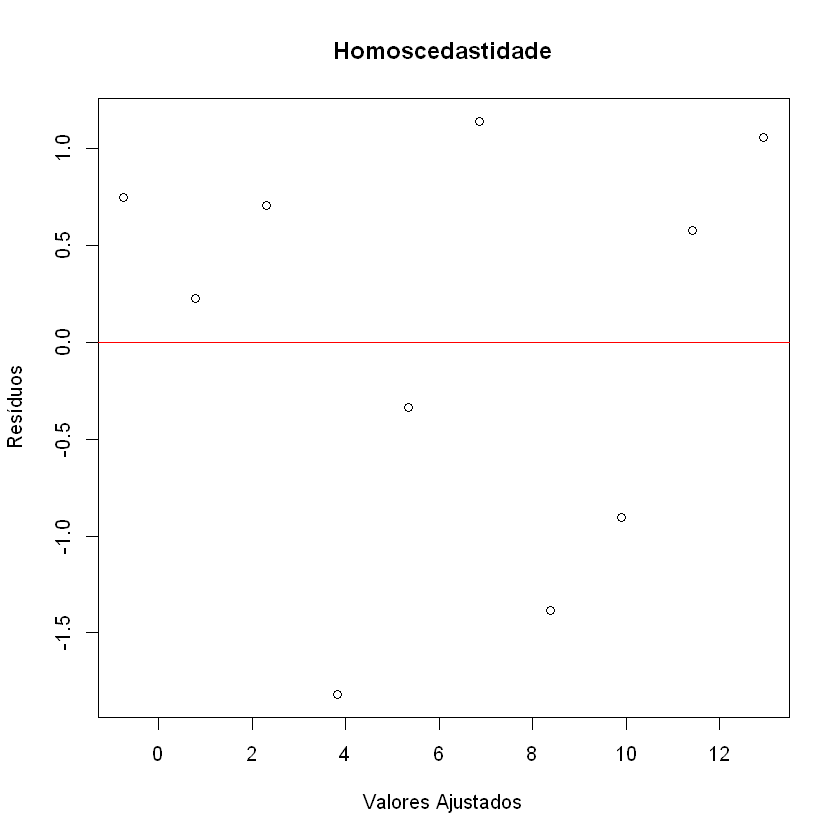

In [47]:
# 3. Homoscedasticidade (Gráfico de Resíduos vs Valores Ajustados)

plot(modelo$fitted.values, resid(modelo), xlab = "Valores Ajustados", ylab = "Resíduos", main = "Homoscedastidade")
abline(h = 0, col = "red")

Warning message in rlm.default(x, y, weights, method = method, wt.method = wt.method, :
"'rlm' failed to converge in 20 steps"


[1] 4 7

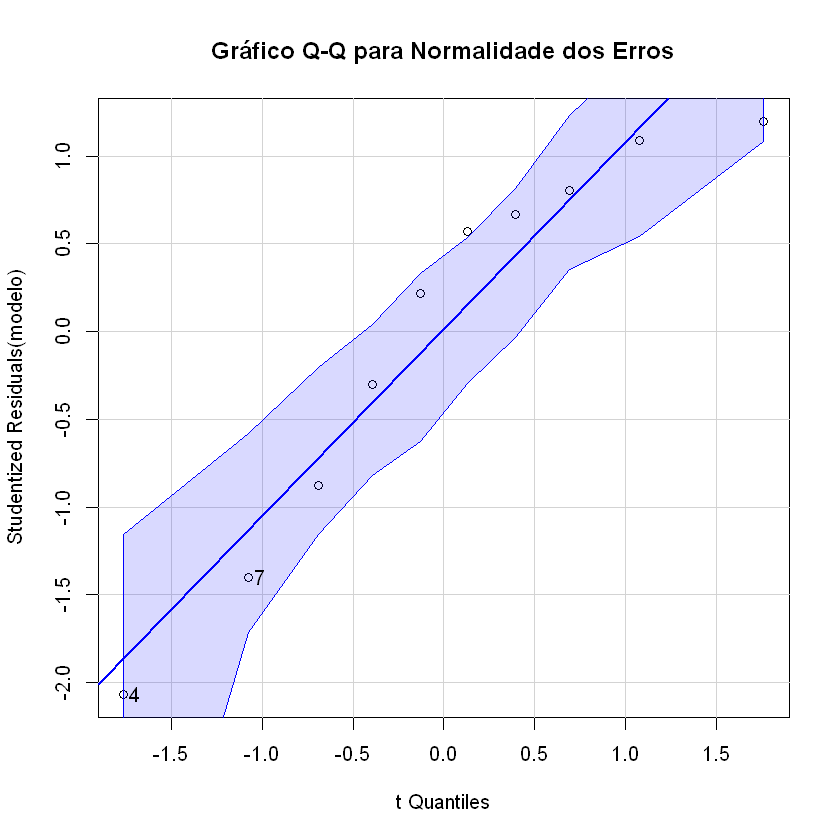

In [48]:
# 4. Normalidade dos Erros (Gráfico Q-Q)

qqPlot(modelo, main = "Gráfico Q-Q para Normalidade dos Erros")

# Realizamos testes, como o Shapiro-Wilk, e contrúimos um gráfico Q-Q para verificar se os erros seguem uma distribuição normal.
# No gráfico Q-Q, os pontos devem alinhar-se aproximadamente com a linha diagonal.

# O mundo ideal é que todas as "bolinhas" estivessem "em cima" da linha.